In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
award_df = pd.read_csv('base.csv')

In [176]:
award_df

,seas_id,season,player_id,player,age,experience,g,gs,mp,fg,...,dpoy,mip,nba mvp,nba roy,smoy,pos_C,pos_PF,pos_PG,pos_SF,pos_SG
0,31136,2024,5025,A.J. Green,24.0,2,56,0.0,614.0,83,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
1,31137,2024,5026,A.J. Lawson,23.0,2,42,0.0,311.0,54,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
2,31138,2024,5027,AJ Griffin,20.0,2,20,0.0,171.0,18,...,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False
3,31139,2024,4219,Aaron Gordon,28.0,10,73,73.0,2297.0,398,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False
4,31140,2024,4582,Aaron Holiday,27.0,6,78,1.0,1269.0,186,...,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,19312,2004,3295,Zendon Hamilton,28.0,4,46,0.0,473.0,51,...,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False
10341,19313,2004,3495,Zoran Planinić,21.0,1,49,1.0,473.0,53,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
10342,19314,2004,3100,Zydrunas Ilgauskas,28.0,6,81,81.0,2539.0,466,...,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False
10343,19307,2004,3493,Žarko Čabarkapa,22.0,1,49,4.0,570.0,81,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False


In [177]:
award_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'age', 'experience', 'g',
       'gs', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent',
       'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'dpoy',
       'mip', 'nba mvp', 'nba roy', 'smoy', 'pos_C', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG'],
      dtype='object')

In [178]:
drop = ['seas_id', 'player_id', 'dpoy', 'mip', 'nba mvp', 'nba roy', 'smoy', 'player', 'season'] 
X = award_df.drop(columns = drop)
y = award_df['nba roy']


In [179]:
# compress y
y_compressed = np.log1p(y)

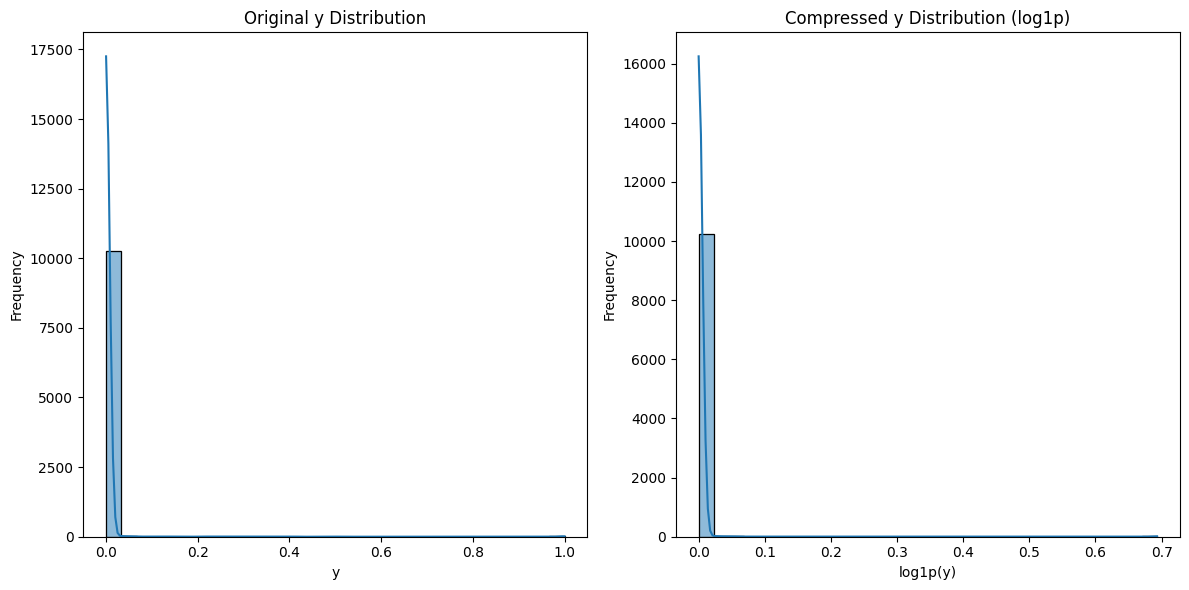

In [180]:
#plot y compressed vs non-compressed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins=30)
plt.title('Original y Distribution')
plt.xlabel('y')
plt.ylabel('Frequency')

# Compressed y distribution
plt.subplot(1, 2, 2)
sns.histplot(y_compressed, kde=True, bins=30)
plt.title('Compressed y Distribution (log1p)')
plt.xlabel('log1p(y)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [181]:
#scale X
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8276, 32), (2069, 32), (8276,), (2069,))

In [183]:
reg_linear = LinearRegression()

reg_linear.fit(X_train, y_train)

LinearRegression()

In [184]:
pred = reg_linear.predict(X_test)
y_pred_linear = np.expm1(pred)
y_test_actual = np.expm1(y_test)  

mse_linear = mean_squared_error(y_test_actual, y_pred_linear)
r2 = r2_score(y_test_actual, y_pred_linear)
print(f"When using a Linear Regression Model, the MSE for MVP Award Shares is: {mse_linear:.4f}")
print(f"R-squared (R^2) for MVP Award Shares: {r2:.4f}")

When using a Linear Regression Model, the MSE for MVP Award Shares is: 0.0064
R-squared (R^2) for MVP Award Shares: 0.0267


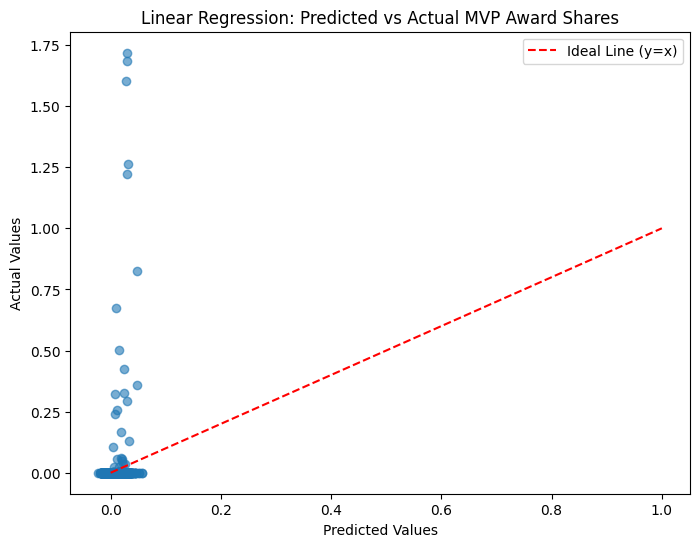

In [185]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, y_test_actual, alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.title("Linear Regression: Predicted vs Actual MVP Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()

In [186]:
reg_tree = DecisionTreeRegressor()

reg_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [187]:
y_pred_tree = reg_tree.predict(X_test)
mse_tree = mean_squared_error(y_pred_tree, y_test)

print(f"When using a Decision Tree Regression Model, the MSE for DPOY Award Shares is {np.round(mse_tree, 4)*100}")

When using a Decision Tree Regression Model, the MSE for DPOY Award Shares is 0.26


Text(0.5, 1.0, 'Residual Plot for Decision Tree Classifier')

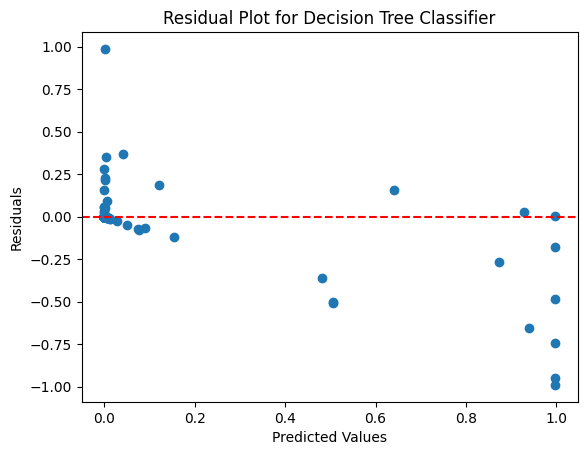

In [188]:
#create residual plot for decision tree classifier

residuals = y_test - y_pred_tree
plt.scatter(y_pred_tree, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', label='0', linestyle='--')
plt.title('Residual Plot for Decision Tree Classifier')

Text(0.5, 1.0, 'Actual vs Predicted Values for Decision Tree Classifier')

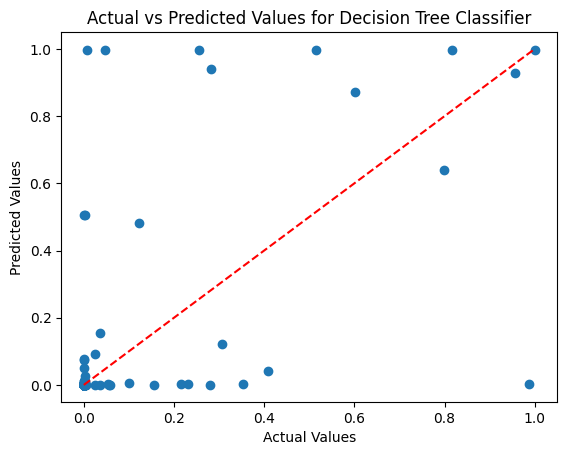

In [189]:
#actual vs predicted plot for decision tree classifier
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted Values for Decision Tree Classifier')
